In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [3]:
data=pd.read_csv(r"tested.csv")

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
age_mean=data["Age"].mean()

In [6]:
data["Age"]=data["Age"].fillna(value=age_mean)

In [7]:
data["Fare"]=data["Fare"].fillna(value=data["Fare"].mean())

In [8]:
label_encoding=LabelEncoder()

In [9]:
data["Embarked_encoded"]=label_encoding.fit_transform(data["Embarked"])

In [10]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_encoded
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,2


In [11]:
data["Embarked_encoded"]=data["Embarked_encoded"].fillna(0)

In [12]:
data.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               327
Embarked              0
Embarked_encoded      0
dtype: int64

In [13]:
data["Cabin_Encoded"]=label_encoding.fit_transform(data["Cabin"])

In [14]:
data["Cabin_Encoded"]=data["Cabin_Encoded"].fillna(0)

In [15]:
data.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               327
Embarked              0
Embarked_encoded      0
Cabin_Encoded         0
dtype: int64

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_encoded,Cabin_Encoded
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,1,76
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,2,76
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,1,76
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,2,76
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,2,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,2,76
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,0,22
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2,76
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,2,76


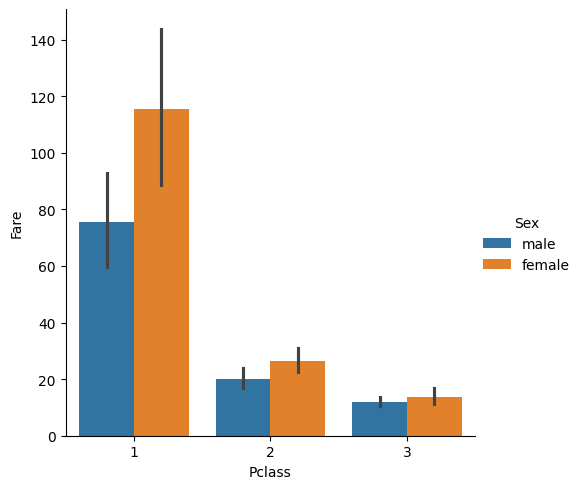

In [17]:
sns.catplot(data=data,kind="bar",x="Pclass",y="Fare",hue="Sex")
plt.show()

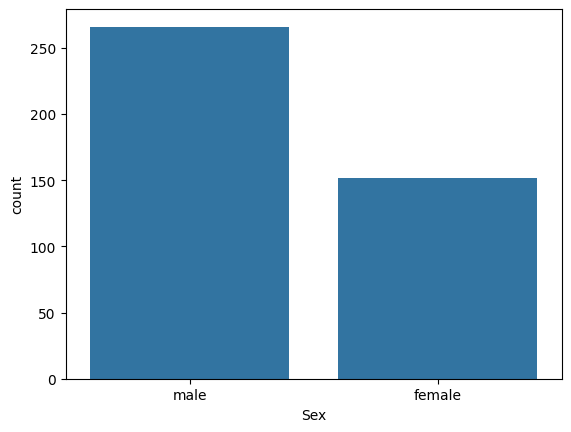

In [18]:
sns.countplot(x="Sex",data=data)
plt.show()

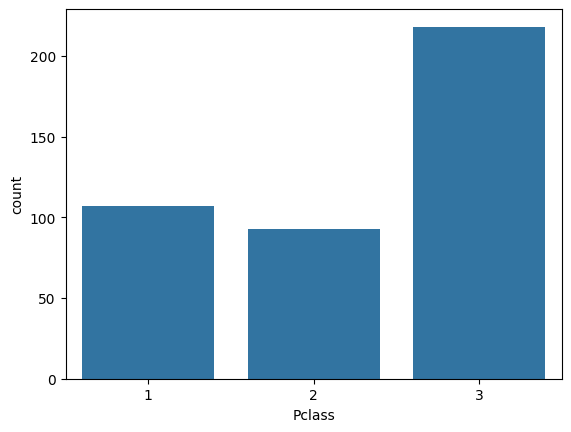

In [19]:
sns.countplot(x="Pclass",data=data)
plt.show()

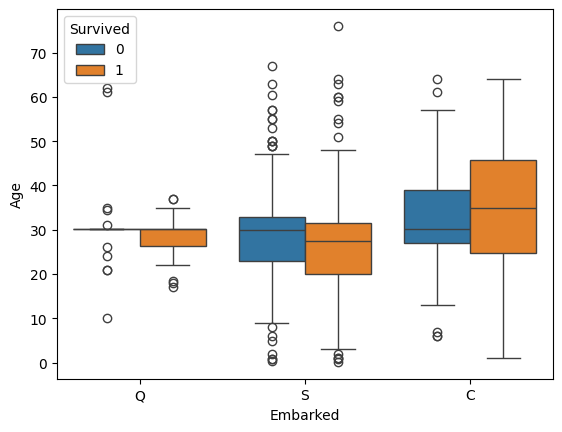

In [20]:
sns.boxplot(x="Embarked",y="Age",hue="Survived",data=data)
plt.show()

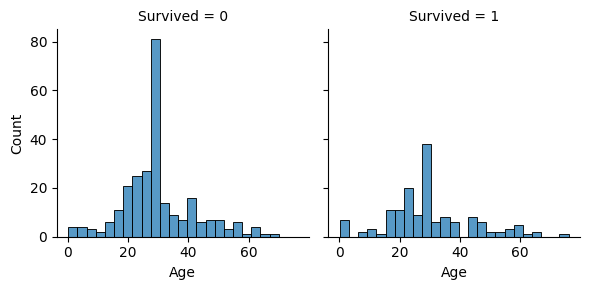

In [21]:
sns.displot(data,x="Age",col="Survived",binwidth=3,height=3,facet_kws=dict(margin_titles=True))
plt.show()

In [22]:
encoded_gender=label_encoding.fit_transform(data["Sex"])

In [23]:
data["Sex_encoded"]=encoded_gender

In [24]:
final_data=data.drop(["Name","Ticket","Cabin","Embarked","Sex"],axis=1)

In [25]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_encoded,Cabin_Encoded,Sex_encoded
0,892,0,3,34.50000,0,0,7.8292,1,76,1
1,893,1,3,47.00000,1,0,7.0000,2,76,0
2,894,0,2,62.00000,0,0,9.6875,1,76,1
3,895,0,3,27.00000,0,0,8.6625,2,76,1
4,896,1,3,22.00000,1,1,12.2875,2,76,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,30.27259,0,0,8.0500,2,76,1
414,1306,1,1,39.00000,0,0,108.9000,0,22,0
415,1307,0,3,38.50000,0,0,7.2500,2,76,1
416,1308,0,3,30.27259,0,0,8.0500,2,76,1


In [26]:
final_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_encoded,Cabin_Encoded,Sex_encoded
PassengerId,1.000000,-0.023245,-0.026751,-0.030874,0.003818,0.043080,0.008209,0.040699,0.012060,0.023245
Survived,-0.023245,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.191382,-0.076281,-0.127938,-1.000000
Pclass,-0.026751,-0.108615,1.000000,-0.440782,0.001087,0.018721,-0.576619,0.227983,0.660165,0.108615
Age,-0.030874,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,0.326800,-0.157996,-0.384965,0.000011
SibSp,0.003818,0.099943,0.001087,-0.079535,1.000000,0.306895,0.171488,0.052708,-0.080243,-0.099943
Parch,0.043080,0.159120,0.018721,-0.045073,0.306895,1.000000,0.230001,0.054577,-0.045538,-0.159120
Fare,0.008209,0.191382,-0.576619,0.326800,0.171488,0.230001,1.000000,-0.257031,-0.574351,-0.191382
Embarked_encoded,0.040699,-0.076281,0.227983,-0.157996,0.052708,0.054577,-0.257031,1.000000,0.273485,0.076281
Cabin_Encoded,0.012060,-0.127938,0.660165,-0.384965,-0.080243,-0.045538,-0.574351,0.273485,1.000000,0.127938
Sex_encoded,0.023245,-1.000000,0.108615,0.000011,-0.099943,-0.159120,-0.191382,0.076281,0.127938,1.000000


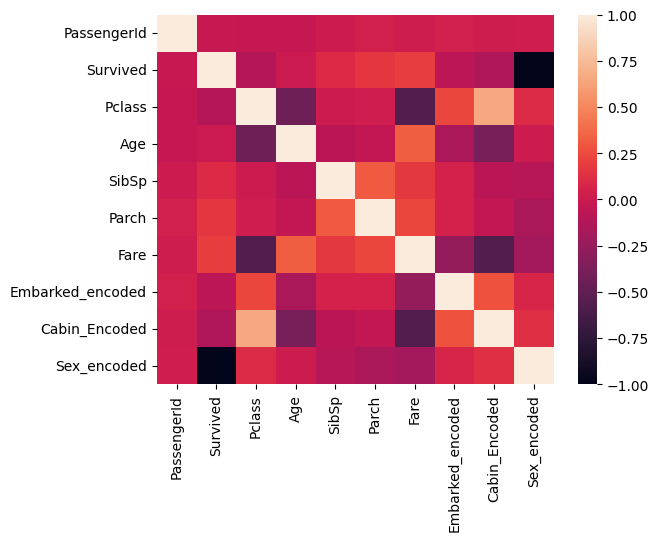

In [27]:
sns.heatmap(final_data.corr())
plt.show()

In [28]:
features=data.drop(["Survived","Embarked","Name","PassengerId","Sex","Parch","Ticket","Cabin"],axis=1)

In [29]:
features

,Pclass,Age,SibSp,Fare,Embarked_encoded,Cabin_Encoded,Sex_encoded
0,3,34.50000,0,7.8292,1,76,1
1,3,47.00000,1,7.0000,2,76,0
2,2,62.00000,0,9.6875,1,76,1
3,3,27.00000,0,8.6625,2,76,1
4,3,22.00000,1,12.2875,2,76,0
...,...,...,...,...,...,...,...
413,3,30.27259,0,8.0500,2,76,1
414,1,39.00000,0,108.9000,0,22,0
415,3,38.50000,0,7.2500,2,76,1
416,3,30.27259,0,8.0500,2,76,1


In [30]:
target=pd.DataFrame(data["Survived"])

In [31]:
target

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [32]:
num_cols=["Pclass","Age","SibSp","Fare","Embarked_encoded","Cabin_Encoded"]

In [33]:
num_transfromer_dict={}
for col in num_cols:
    num_transfromer_dict[col]=StandardScaler().fit(data[[col]])

In [34]:
x_cols=num_cols
x_raw_feature=data[x_cols]

In [35]:
x_raw_feature

,Pclass,Age,SibSp,Fare,Embarked_encoded,Cabin_Encoded
0,3,34.50000,0,7.8292,1,76
1,3,47.00000,1,7.0000,2,76
2,2,62.00000,0,9.6875,1,76
3,3,27.00000,0,8.6625,2,76
4,3,22.00000,1,12.2875,2,76
...,...,...,...,...,...,...
413,3,30.27259,0,8.0500,2,76
414,1,39.00000,0,108.9000,0,22
415,3,38.50000,0,7.2500,2,76
416,3,30.27259,0,8.0500,2,76


In [36]:
for transforemer_name,transforemer in num_transfromer_dict.items():
    x_raw_feature[f"{transforemer_name}_num_transformation"] = transforemer.transform(x_raw_feature[[transforemer_name]])

/tmp/ipykernel_6343/1391451259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_raw_feature[f"{transforemer_name}_num_transformation"] = transforemer.transform(x_raw_feature[[transforemer_name]])
/tmp/ipykernel_6343/1391451259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_raw_feature[f"{transforemer_name}_num_transformation"] = transforemer.transform(x_raw_feature[[transforemer_name]])
/tmp/ipykernel_6343/1391451259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [37]:
x_raw_feature

,Pclass,Age,SibSp,Fare,Embarked_encoded,Cabin_Encoded,Pclass_num_transformation,Age_num_transformation,SibSp_num_transformation,Fare_num_transformation,Embarked_encoded_num_transformation,Cabin_Encoded_num_transformation
0,3,34.50000,0,7.8292,1,76,0.873482,0.334993,-0.499470,-0.498407,-0.470915,0.449022
1,3,47.00000,1,7.0000,2,76,0.873482,1.325530,0.616992,-0.513274,0.700767,0.449022
2,2,62.00000,0,9.6875,1,76,-0.315819,2.514175,-0.499470,-0.465088,-0.470915,0.449022
3,3,27.00000,0,8.6625,2,76,0.873482,-0.259330,-0.499470,-0.483466,0.700767,0.449022
4,3,22.00000,1,12.2875,2,76,0.873482,-0.655545,0.616992,-0.418471,0.700767,0.449022
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,8.0500,2,76,0.873482,0.000000,-0.499470,-0.494448,0.700767,0.449022
414,1,39.00000,0,108.9000,0,22,-1.505120,0.691586,-0.499470,1.313753,-1.642598,-2.382865
415,3,38.50000,0,7.2500,2,76,0.873482,0.651965,-0.499470,-0.508792,0.700767,0.449022
416,3,30.27259,0,8.0500,2,76,0.873482,0.000000,-0.499470,-0.494448,0.700767,0.449022


In [38]:
x= x_raw_feature[[col for col in x_raw_feature if col.endswith("_num_transformation")]]

In [39]:
x.head()

,Pclass_num_transformation,Age_num_transformation,SibSp_num_transformation,Fare_num_transformation,Embarked_encoded_num_transformation,Cabin_Encoded_num_transformation
0,0.873482,0.334993,-0.499470,-0.498407,-0.470915,0.449022
1,0.873482,1.325530,0.616992,-0.513274,0.700767,0.449022
2,-0.315819,2.514175,-0.499470,-0.465088,-0.470915,0.449022
3,0.873482,-0.259330,-0.499470,-0.483466,0.700767,0.449022
4,0.873482,-0.655545,0.616992,-0.418471,0.700767,0.449022


In [40]:
x =x.rename(columns={i:i.replace("_num_transformation","") for i in x.columns})

In [41]:
x

,Pclass,Age,SibSp,Fare,Embarked_encoded,Cabin_Encoded
0,0.873482,0.334993,-0.499470,-0.498407,-0.470915,0.449022
1,0.873482,1.325530,0.616992,-0.513274,0.700767,0.449022
2,-0.315819,2.514175,-0.499470,-0.465088,-0.470915,0.449022
3,0.873482,-0.259330,-0.499470,-0.483466,0.700767,0.449022
4,0.873482,-0.655545,0.616992,-0.418471,0.700767,0.449022
...,...,...,...,...,...,...
413,0.873482,0.000000,-0.499470,-0.494448,0.700767,0.449022
414,-1.505120,0.691586,-0.499470,1.313753,-1.642598,-2.382865
415,0.873482,0.651965,-0.499470,-0.508792,0.700767,0.449022
416,0.873482,0.000000,-0.499470,-0.494448,0.700767,0.449022


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.2,random_state=42,stratify=target)

In [43]:
logistics_model=LogisticRegression()

In [44]:
logistics_model.fit(x_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [45]:
logistics_model.fit(x_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [46]:
y_pred_logistics=logistics_model.predict(x_train)

In [47]:
accuracy = accuracy_score(y_train,y_pred_logistics)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 67.07 %.


In [48]:
random_model_classifier=RandomForestClassifier(n_estimators=100)

In [49]:
random_model_classifier.fit(x_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [50]:
y_pred_random=random_model_classifier.predict(x_train)

In [51]:
accuracy = accuracy_score(y_train,y_pred_random)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 97.01 %.


In [52]:
user_inputs = []
for column in x.columns:
    user_inputs.append(input(f"{column} : "))

Pclass :  3
Age :  21
SibSp :  0
Fare :  758
Embarked_encoded :  2
Cabin_Encoded :  0


In [53]:
user_clean_input = [float(i) for i in user_inputs]

In [54]:
random_model_classifier.predict([user_clean_input])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])